In [26]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram  # Optional for visualization

def prepare_bb84_key():
    # Initialize quantum circuit
    qc = QuantumCircuit(1, 1)
    
    qc.h(0)  # Apply Hadamard gate
    qc.measure(0, 0)  # Measure the qubit
    
    # Simulate the circuit directly using the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(qc).result()  # Run the circuit directly
    counts = result.get_counts()
    
    return counts

bb84_key = prepare_bb84_key()
print("BB84 Generated Key:", bb84_key)

BB84 Generated Key: {'1': 499, '0': 525}


In [44]:
import pandas as pd
import random

# Define a function to generate random data points within a specified range
def generate_data_point():
    qubit_prep_time = random.randint(5, 25)
    measurement_error_rate = random.uniform(0.005, 0.05)
    key_generation_rate = random.randint(500, 3000)
    return qubit_prep_time, measurement_error_rate, key_generation_rate

# Generate 10000 data points
data = []
for i in range(1000):
    data_point = generate_data_point()
    data.append(data_point)

# Create a pandas DataFrame from the generated data
data = pd.DataFrame(data, columns=['qubit_prep_time', 'measurement_error_rate', 'key_generation_rate'])

data['prep_error_ratio'] = data['qubit_prep_time']/data['measurement_error_rate']

print(data.head(1000))
data.to_csv("qkd_data.csv", index=False) 

     qubit_prep_time  measurement_error_rate  key_generation_rate  \
0                 17                0.024544                 2057   
1                  8                0.025388                 2887   
2                 25                0.041410                 1051   
3                 18                0.010844                 2052   
4                 12                0.013152                 1544   
..               ...                     ...                  ...   
995                5                0.047334                 2057   
996               25                0.027696                 2247   
997                5                0.041785                  867   
998               25                0.044572                 2178   
999                5                0.048577                 1995   

     prep_error_ratio  
0          692.631448  
1          315.103310  
2          603.723643  
3         1659.896890  
4          912.426308  
..                ...  
995

Mean Squared Error: 1049238.985


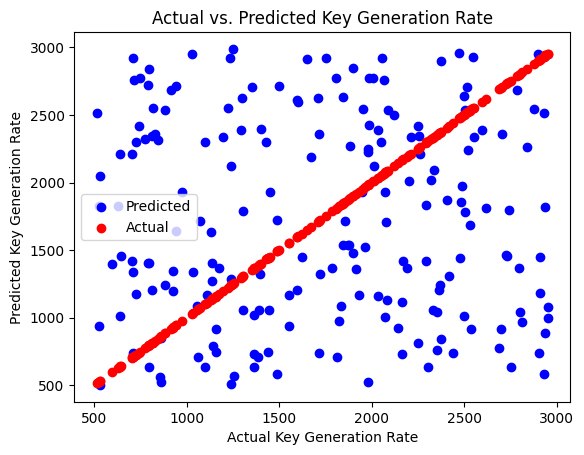

In [30]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#
X = data[['qubit_prep_time', 'measurement_error_rate']]
y = data['key_generation_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted key generation rate
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Key Generation Rate')
plt.ylabel('Predicted Key Generation Rate')
plt.title('Actual vs. Predicted Key Generation Rate')
plt.legend()
plt.show()

In [31]:
import numpy as np
import pandas as pd  # Make sure to import pandas

# Generate 1000 new data points
new_data = pd.DataFrame({
    'qubit_prep_time': np.random.randint(5, 25, size=1000),  # Generate 1000 random integers
    'measurement_error_rate': np.random.uniform(0.005, 0.05, size=1000)  # Removed 'prep_error_ratio'
    # 'prep_error_ratio' is removed to match the model's training features
})

# Make predictions for each data point
predicted_rates = model.predict(new_data)

# Print the predicted key generation rates
print("Predicted key generation rates:", predicted_rates)

Predicted key generation rates: [2827. 1634. 1680. 1422. 2332. 1631. 2079. 2973. 2325. 1475. 1167. 1680.
  509. 2962. 2040.  816. 1014. 1051.  657. 1991. 2900. 1746. 1013.  867.
 2466.  530. 1784. 1798. 1322. 1797. 1002.  973. 2247. 2631. 1013. 2954.
 1144. 1706. 2270.  776. 2338. 2728. 1325. 1819. 1797.  886. 2226. 1961.
 2771. 1344. 2247. 2199. 1488. 2905. 1293. 2927. 1820. 1173. 1706.  569.
 1061. 1040. 1490. 2845. 1638. 2067. 1537. 1852. 2447. 2531. 1098. 1420.
 2361. 1060.  923. 1167. 2447. 2093. 2716. 2905. 2861. 1488. 1637. 1088.
 2635.  552. 2255.  516. 1521.  650. 2390. 1879. 1047. 2921. 1751. 1089.
 2314.  574.  650. 1955. 2117. 2301. 2012. 1450.  543. 1714. 1820. 2861.
  969. 2262. 2981. 2631.  973. 2951. 1421. 2197. 1587. 2763. 2421. 1751.
  686. 1609. 1663. 1930. 1915. 2164. 1040. 1857. 2796.  788.  827. 2717.
 2712. 1409. 1718. 2033. 2724. 1147.  841. 1784. 2262. 2784. 2301. 2511.
 1521. 2893.  854.  581. 1055.  589. 1839. 2077. 2244. 2666.  986. 2987.
 1232. 1250. 1511. 

In [32]:
# Simple text analysis function
def analyze_text(text):
    # For demonstration, we'll just return the length of the text and word count
    word_count = len(text.split())
    return {
        "text_length": len(text),
        "word_count": word_count
    }

# Simple social media monitoring function
def monitor_social_media(keywords):
    # For demonstration, we'll just return the keywords
    return {
        "keywords": keywords,
        "count": len(keywords)
    }

# Analyze security literature
results = analyze_text("quantum hacking techniques")
print(results)

# Monitor online discussions
results = monitor_social_media(keywords=["quantum encryption", "security"])
print(results)

{'text_length': 26, 'word_count': 3}
{'keywords': ['quantum encryption', 'security'], 'count': 2}


In [36]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Create a new quantum circuit
circuit = QuantumCircuit(2)  # Assuming two qubits for Alice and Bob

# Option 1: Using Bell State Preparation (for entangled states)
# circuit = qiskit.circuit.library.BellStatePreparation(circuit, 'ccx2')  # Example Bell state preparation

# Option 2: Building custom BB84 circuit (replace with your actual logic)
circuit.h(0)  # Apply Hadamard to Alice's first qubit for superposition
circuit.h(1)  # Apply Hadamard to Alice's second qubit for superposition
# ... Add further gates and operations as needed for your BB84 protocol

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024)

# Extract measurement results
try:
    counts = result.result().get_counts()
    print(counts)
except Exception as e:
    print("Error getting counts:", e)
    # Handle the error appropriately (e.g., retry simulation, check circuit structure)

Error getting counts: 'No counts for experiment "0"'


In [ ]:
from ibm_watsonx_ai.data_loaders import DataLoaders
from ibm_watsonx_ai.experiment import Experiment
from ibm_watsonx_ai.training import TrainingJob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from qiskit import QuantumCircuit

# Load the generated data
data = pd.read_csv("qkd_data.csv")  
# Preprocess data
X = data[['num_qubits', 'gate_count', 'circuit_depth']]
y = data['measurement_result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

experiment = Experiment.create(name="Quantum Circuit Generation Prediction")

# Create a training job
training_job = TrainingJob.create(experiment, name="Linear Regression Model")
l
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Model score:", score)

new_circuit_data = [[5, 10, 3]]  
predicted_result = model.predict(new_circuit_data)
print("Predicted result:", predicted_result)